# Face detection
- The functions in python_scripts use haar_cascades
- This notebook uses a pretrained Deep Neural Net for face detection
- Within the face detection the dlib library provides facial feature detection

#### This example shows how to edit a single image
##### To do:
- add in ears for the snapchat filter
- modify code to edit a video
- remember a video is just a sequence of frames!

##### Note:
- The blue boxes and green dots are there to help you identify facial features
- You can edit out the code that creates them

##### Credits:
- A large part of this notebook is based on www.pyimagesearch.com

In [161]:
from imutils.video import FileVideoStream
import numpy as np
import argparse
import imutils
import time
import cv2
import matplotlib.pyplot as plt
import os
import dlib
from imutils import face_utils

In [189]:
#load deeplearning model
directory = '../deep-learning-face-detection'
modelPath = os.path.join(directory, 'res10_300x300_ssd_iter_140000.caffemodel')
prototxtPath = os.path.join(directory, 'deploy.prototxt.txt')
minConfidence = .3
net = cv2.dnn.readNetFromCaffe(prototxtPath, modelPath)

#load picture, don't forget to close with vs.release()!
vs = FileVideoStream(path= '../videos/recording4.mp4').start()

# grab the frame from the video stream and resize it
# to have a maximum width of 400 pixels
frame = vs.read()
frame = imutils.resize(frame, width=400)

# grab the frame dimensions and convert it to a blob. We want to work with a 300x300 image because its faster
(h, w) = frame.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
    (300, 300), (104.0, 177.0, 123.0))

In [174]:
# pass the blob through the neural network and obtain the detections and
# predictions
net.setInput(blob)
detections = net.forward()

(1, 1, 142, 7)

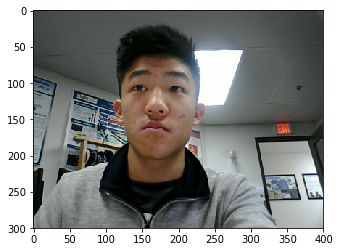

In [175]:
#this is what the frame looks like
plt.imshow(frame[...,::-1])
detections.shape

In [176]:
# loop over the face detections
rects = dlib.rectangles()
for i in range(0, detections.shape[2]):
    # % confidence that a face is detected
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the calculated confidence is
    # greater than the minimum confidence
    if confidence < minConfidence:
        continue

    # compute the (x, y)-coordinates of the bounding box for the
    # object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    rects.append(dlib.rectangle(startX, startY, endX, endY))
    # draw the bounding box of the face along with the associated
    # probability
    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(frame, (startX, startY), (endX, endY),
        (255, 0, 0), 2)
    cv2.putText(frame, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 0), 2)

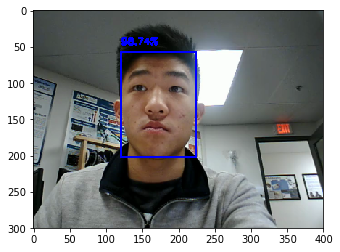

In [177]:
plt.imshow(frame[...,::-1])

# FEATURE DETECTOR

In [178]:
# load classifier
p = os.path.join(directory, "shape_predictor_68_face_landmarks.dat")
#already detected faces with neural net
#detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)
#we don't need color to detect faces
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

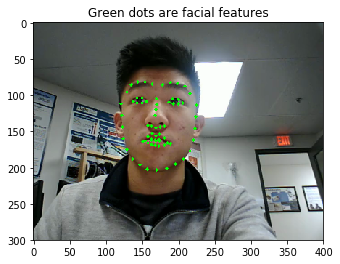

In [193]:
# detect faces in the grayscale image
#rects = detector(gray, 0)
 
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for_show = frame.copy()
    for (x, y) in shape:
        cv2.circle(for_show, (x, y), 2, (0, 255, 0), -1)
    plt.imshow(for_show[...,::-1])
    plt.title('Green dots are facial features')
    plt.show()

# Facial features
<img src="https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-1024x825.jpg" alt="drawing" width="500"/>


In [147]:
def show_facial_features(frame, shape, alpha = .5, colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23), 
          (168, 100, 168), (158, 163, 32),
          (163, 38, 32), (180, 42, 220)]):
    overlay = frame.copy()
    output = frame.copy()
    
    #loop through facial features aka facial landmarks
    for i, name in enumerate(face_utils.FACIAL_LANDMARKS_IDXS.keys()):
        j, k = face_utils.FACIAL_LANDMARKS_IDXS[name]
        
        # pts has the coordinates of the facial features
        pts = shape[j:k]
        if name == "jaw":
            # since the jawline is a non-enclosed facial region,
            # just draw lines between the (x, y)-coordinates
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)

        # otherwise, compute the convex hull and fill it in
        else:
            hull = cv2.convexHull(pts)
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)
        # apply the transparent overlay
        cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
        # return the output image
    return output

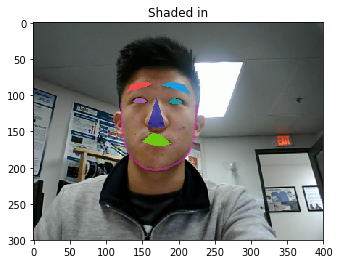

In [195]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    # shaded in facial features
    shaded_in = show_facial_features(frame, shape)
    plt.imshow(shaded_in[...,::-1])
    plt.title('Shaded in')
    plt.show()

# Doggo Nose

- learn to put the snapchat nose on your face
<img src="http://rightswipepics.com/wp-content/uploads/2018/02/snapchat.dog_.filter.jpg" alt="drawing" width="300"/>

### Helper functions

In [145]:
def angle(v1, v2):
    """
        Name: angle
        Inputs: two numpy arrays
        Returns: the angle between the two vectors
        What it does: computes the angle between two vectors
    """
    angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    return angle

def add_alpha(im):
    """
        Name: add_alpha
        Inputs: image(numpy array with shape (y, x, 3))
        Returns: image(numpy array with shape (y, x, 4))
        What it does: makes a new image with the alpha dimension which is transparency/opaqueness
    """
    img = im.copy()
    tmp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
    b, g, r = cv2.split(img)
    rgba = [b,g,r, alpha]
    dst = cv2.merge(rgba,4)
    return dst

def overlay_img(sImg, lImg, x_offset, y_offset):
    """
        Name: overlay_img
        Inputs: source image, target image, x offset, y_offset
            x and y offset is where to put the source image on the target image
        Returns: new image with small image on the large image
        What it does: puts the small image on the large image with x,y offset
    """
    s_img = sImg.copy()
    l_img = lImg.copy()
    
    y1, y2 = y_offset, y_offset + s_img.shape[0]
    x1, x2 = x_offset, x_offset + s_img.shape[1]
    s_img = add_alpha(s_img)
    alpha_s = s_img[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    for c in range(0, 3):
        l_img[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                                  alpha_l * l_img[y1:y2, x1:x2, c])
    return l_img

### Put in nose

In [184]:
def put_in_nose(frame, shape):
    #read in the image
    img = cv2.imread('../sprites/doggy_nose.png',1)

    topNose = shape[27]
    topMouth = shape[51]
    center = shape[30]

    #figure out how much to rotate nose by
    v1 = topNose- center
    v2 = topNose -(topNose[0], topMouth[1])
    nose_angle = np.degrees(angle(v1, v2))

    #adjust nose size to fit between the top of the center of the nose and the top of the mouth
    noseHeight = int(np.linalg.norm(topMouth-center))
    resized_nose = imutils.resize(img, height = noseHeight)

    #find offset, centering the nose betwen the center of the nose and the top of the mouth
    y, x , _ = resized_nose.shape
    x_offset = center[0]-x//2
    y_offset = center[1]

    #rotate nose
    rotated_nose = imutils.rotate_bound(resized_nose, nose_angle)

    # overlay the nose on the picture
    new_img = overlay_img(rotated_nose, frame, x_offset , y_offset)
    return new_img

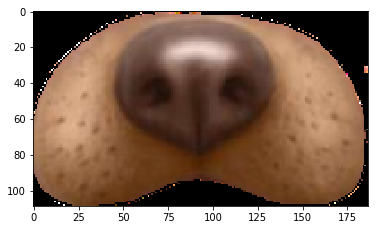

In [192]:
# to let you know what we're working with
dogNose = cv2.imread('../sprites/doggy_nose.png',1)
plt.imshow(dogNose[...,::-1])
plt.show()

# Assortment of facial features

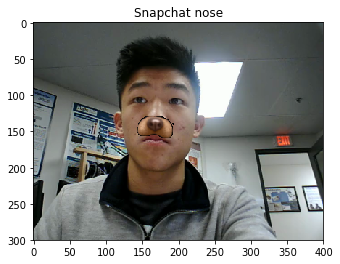

In [196]:
# detect faces in the grayscale image
#rects = detector(gray, 0)
 
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    #snapchat nose
    with_nose = put_in_nose(frame, shape)
    plt.imshow(with_nose[...,::-1])
    plt.title('Snapchat nose')
    plt.show()

# Starting  dog ear code

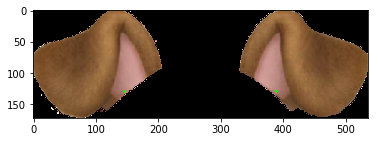

In [190]:
img = cv2.imread('../sprites/doggy_ears.png',1)

n = img.copy()

y, x , _ = n.shape

# little green dots on the ears for measurement purposes
cv2.circle(n, (x*8//11, y*3//4), 2, (0, 255, 0), -1)
cv2.circle(n, (x*3//11, y*3//4), 2, (0, 255, 0), -1)

plt.imshow(n[...,::-1])
plt.show()